# Practical Linear Algebra for Data Science

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# setup animation
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')


# to read an image from a url (io) and convert it to grayscale (color)
from skimage import io,color
# convolution
from scipy.signal import convolve2d
from scipy.linalg import hilbert

import scipy


import pandas as pd
import sympy as sym
import time


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

###### ============================
# Chapter 13
## Eigendecomposition


- Eigendecomp is only defined for square matrices. SVD is defined for rectangular matrices.
- Eigenvectors of a matrix $A$ are the vectors that when multiplied by the matrix, the vector is only strecthed, is not rotated $Av=\lambda v$. The vector $v$ is the eigenvector and $\lambda$ is the eigenvalue. So the matrix multiplication acts like a scalar-multiplication for eigenvectors.
- <b><u> Prinicpal Component Analysis (PCA) </u></b>: Bivariate correlation doesn't work for system which have multiple variables effecting it. When we have a multivariates effecting somethjing, if we drive the dataset matrix, then if we look at the eigenvalues, if one eigenvalue is large and the rest are small, it means that one major component is contributing most of the change in the system. But if we have multiple major componetns, there are more variables.
- <b><u> Noise Reduction </u></b>: One method of reducing noise is by projecting out the small eigenvalues of the system. This means we set the eigenvalues smaller than a certain threshold to zero.
- <b><u> Data Compression (dimension reduction) </u></b>: Taking eigendecomp of a large dataset, dropping the eigenpairs associated with small direction and transmit only larger eignenpairs.

## Finding Eignevalues and Vectors

>> eignevalues = np.linalg.eig(Matrix)[0]

- $Av=\lambda v \implies (A-\lambda I)v=0$
- This means that the eignevector is in the nullspace of $A-\lambda I$. Hence the shifted matrix $A-\lambda I$ is singular, so its null-space is nontrivial. So its determinant should be zero
- Charactrestics Polynomial is $det(A-\lambda I)=|A-\lambda I|=0$. The roots of this polynom will give us the eigenvalues.
- An $M\times M$ has $M$ eigenvalues.

>> eignevals, eigenvecs = np.linalg.eig(Matrix) <i>#eigenvecs are stored in the columns, not the rows</i>

- Egein vectors are found by solving the LM equation of $(A-\lambda I)v=0$ for each $\lambda$ from above.
- It is convenient that the eigenvectors are normalize (norm of 1). The function above returns normalized vectors.
- For a full rank matrix in $\mathbb{R}^M$, the set of eigenvectors will span all of $\mathbb{R}^M$
- For a matrix $A$ with $\lambda$, the eigenvalues of $A^{-1}$ is $\lambda^{-1}$ and the eigenvectors are the same.

## Diagonalizing a Square Matrix

For $A_{M\times M}$, we have $M$ equations as $Av_1=\lambda_1v_1$, $Av_2=\lambda_2v_2$, ..., $Av_n=\lambda_nv_n$, we can reqwire this as:

$$AV=V\Lambda$$

$$V=\begin{bmatrix} v_{11} & v_{21} & ... & v_{n1}\\ v_{12}&v_{22}&...&v_{n2}\\...\end{bmatrix}, \Lambda = \begin{bmatrix} \lambda_{1} & 0 & ... & 0\\ 0&\lambda_2&...&0\\...\end{bmatrix}$$

So matrix $A$ becomes diagonalized inside the space of $V$ by $\Lambda = V^{-1}AV$. So in the standard basis $A$ is dense with informatio. When we trabsform it into the basis of eignvectors, the matrix becomes sparse and diagonal with less information density. 



In [2]:
A=np.random.randn(3,3)
eigvals, eigvecs = np.linalg.eig(A)
print(f'Eigenvalues are: {eigvals},\n and the corresponding eigenvectors are:\n{eigvecs}\n')

#diagonalizing
D=np.diag(eigvals)
print(D)


Eigenvalues are: [-1.7724748   1.58431327  1.34907084],
 and the corresponding eigenvectors are:
[[-0.58000247 -0.74968283 -0.52914951]
 [-0.29618618  0.66138252  0.81628751]
 [ 0.75886157 -0.02342676  0.23167974]]

[[-1.7724748   0.          0.        ]
 [ 0.          1.58431327  0.        ]
 [ 0.          0.          1.34907084]]


###### ============================
### Symmetric Matrices and their Eigenpairs

- Symetric matrices have orthogonal eigenvectors. $v_i^Tv_j=0, v_i,v_j\in \texttt{eigenvectors of symm mat}$ or $V^TV=D$ where D is diagonal vectors with norm of $v_i$ in element $(i,i)$. If eigenvector are normalized then $V^TV=I$ and $V^T=V^{-1}$
- Symmetric matrices have real-valued eigen pairs.
- This Numpy function can be used instead of eig for symmetric matrices and it is faster and more stable:
>> np.linalg.eigh(MAT)




In [3]:
A=np.random.randn(3,3)
A=A.T@A

eigvals, eigvecs = np.linalg.eigh(A)
print(f'Eigenvalues are: {eigvals},\n and the corresponding eigenvectors are:\n{eigvecs}\n')

print(np.round(eigvecs.T@eigvecs,2))

Eigenvalues are: [0.3515534 1.5529147 6.2294343],
 and the corresponding eigenvectors are:
[[ 0.87655155  0.2356041  -0.4197    ]
 [-0.04152248 -0.83173114 -0.55362369]
 [-0.47951357  0.50270669 -0.71927235]]

[[ 1. -0.  0.]
 [-0.  1. -0.]
 [ 0. -0.  1.]]


###### ============================
### Symmetric Matrices and their Eigenpairs

If a matrix is singular then at least one eigenvalue is 0. This does not mean that the number of nonzero eigenvalues is equal to the rank of the matrix.

In [4]:
A=np.random.randn(4,3)
A=np.hstack((A,A[:,0:1]))

print(f'A is {A.shape}, but has rank = {np.linalg.matrix_rank(A)}')

eigvals, eigvecs = np.linalg.eig(A)
print(f'Eigenvalues are: {np.round(eigvals,2)},\n and the corresponding eigenvectors are:\n{np.round(eigvecs,2)}\n')

A is (4, 4), but has rank = 3
Eigenvalues are: [ 2.43  0.21  0.   -0.82],
 and the corresponding eigenvectors are:
[[ 0.36  0.63 -0.71 -0.82]
 [-0.11  0.05 -0.    0.49]
 [-0.83 -0.   -0.    0.06]
 [-0.42 -0.78  0.71  0.28]]



###### ============================
### Quadratic Form

for $A_{M\times M}$, and $w_{M \times 1}$, the quadratic form in:

$$w^TAw=\alpha, \alpha \in \mathbb{R}$$

usually we consider one specific matrix and all posible vectors $w$.

$$Av=\lambda v \implies v^TAv=\lambda v^Tv \implies v^TAv=\lambda ||v||^2$$

So the sign of the right hand side is determined by the sign of $\lambda$.

If we generalize it: for any linear combination of the eigenvectors $\lambda$ and the same linear combination of the corresponding eigenvalues $\zeta$:

$$u^TAu=\zeta ||u||^2$$


### Definiteness

It is a characteristic of a <u>square matrix</u> and is defined by sign of the eigen values which is the same as the sign of the quadratic form $u^TAu$, $u \in \mathbb{R^{m}}$.

- Pos Def: Eignvals $> 0$, and it is invertible
- Pos SemDef: Eignvals $\geq 0$, and it is not invertible (singular matrix has at least one 0 eigenval)
- Indef: Eignvals pos or neg. Invertible is not guaranteed
- Neg SemDef: Eignvals $\leq 0$, and it is not invertible (singular matrix has at least one 0 eigenval)
- Neg Def: Eignvals $< 0$, and it is invertible


### $A^TA$ is positive (Semi)Def

Any matrix $S$ that can be expressed as the product of $S=A^TA$ is guaranteed to be PD or PSD.

Note: Not all symmetric matrices can be expressed as $A^TA$, so not all symmetruc matrices are PSD.

In [5]:
#Exer 1 create the matrix
A = np.random.randn(5,5)
A = A.T@A

# compute its inverse
Ai = np.linalg.inv(A)

# eigenvalues of A and Ai
eigvals_A, eigenvecs_A  = np.linalg.eig(A)
eigvals_Ai, eigenvecs_Ai = np.linalg.eig(Ai)

# compare them (hint: sorting helps!)
print('Eigenvalues of A:')
print(np.sort(eigvals_A))

print(' ')
print('Eigenvalues of inv(A):')
print(np.sort(eigvals_Ai))

print(' ')
print('Reciprocal of evals of inv(A):')
print(np.sort(1/eigvals_Ai))


Eigenvalues of A:
[9.84298661e-04 3.48223640e-01 1.98107488e+00 4.68346751e+00
 6.07493853e+00]
 
Eigenvalues of inv(A):
[1.64610719e-01 2.13517014e-01 5.04776479e-01 2.87171773e+00
 1.01595180e+03]
 
Reciprocal of evals of inv(A):
[9.84298661e-04 3.48223640e-01 1.98107488e+00 4.68346751e+00
 6.07493853e+00]


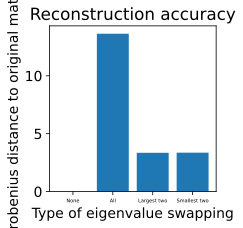

In [6]:
#Exer 3

N=5
Nexp=20


reconAcc = np.zeros((Nexp, 4))

for i in range(Nexp):
    A=np.random.randn(N,N)
    A=A.T@A
    
    evals, evecs = np.linalg.eig(A)
#    print(evals)
    A_recon = evecs@np.diag(evals)@evecs.T
    reconAcc[i,0] = np.round(np.linalg.norm(A - A_recon,'fro'),2)
    
    #swapping all eigenvalues
    evals_tild = evals[np.random.permutation(N)]
    A_recon = evecs@np.diag(evals_tild)@evecs.T
    reconAcc[i,1] = np.round(np.linalg.norm(A - A_recon,'fro'),2)

    ### swap only the two largest eigenvalues
    evals_sort_idx = np.argsort(evals) # note: default is to sort
    i = evals_sort_idx[np.r_[np.arange(N-2),N-1,N-2]][::-1]

    evals_tild = evals[i]
    A_recon = evecs@np.diag(evals_tild)@evecs.T
    reconAcc[i,2] = np.round(np.linalg.norm(A - A_recon,'fro'),2)

    evals_sort_idx = np.argsort(evals) # note: default is to sort 
    i = evals_sort_idx[np.r_[1,0,np.arange(2,N)]][::-1]
    evals_tild = evals[i]
    A_recon = evecs@np.diag(evals_tild)@evecs.T
    reconAcc[i,3] = np.round(np.linalg.norm(A - A_recon,'fro'),2)


reconAcc_average=np.zeros(4)

for i in range(4):
    reconAcc_average[i]=np.mean(reconAcc[:,i])

plt.figure(figsize=(3,3))

plt.bar(range(4),reconAcc_average)
plt.xticks(range(4),labels=['None','All','Largest two','Smallest two'],fontsize=5)
plt.ylabel('Frobenius distance to original matrix')
plt.xlabel('Type of eigenvalue swapping')
plt.title('Reconstruction accuracy')

plt.show()

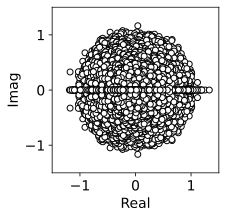

In [7]:
#Exer 4
nIter = 123
matsize = 42
evals = np.zeros((nIter,matsize),dtype=complex)

# create the matrices and get their scaled eigenvalues
for i in range(nIter):
  A = np.random.randn(matsize,matsize)
  evals[i,:] = np.linalg.eig(A)[0] / np.sqrt(matsize)



# and show in a plot
plt.figure(figsize=(3,3))

plt.plot(np.real(evals),np.imag(evals),'ko',markerfacecolor='white')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.xlabel('Real')
plt.ylabel('Imag')
plt.show()

In [8]:
#Exer 5
A = np.random.randn(3,3)
A = A.T@A

evals, evecs = np.linalg.eigh(A)

print(evecs)
print('')

for l in evals:
    print(scipy.linalg.null_space(A-l*np.eye(A.shape[0])))
    print('')

[[-0.36223722 -0.34118001 -0.86739863]
 [-0.93169895  0.10572466  0.34750447]
 [ 0.02685616 -0.93403345  0.35617447]]

[[ 0.36223722]
 [ 0.93169895]
 [-0.02685616]]

[[-0.34118001]
 [ 0.10572466]
 [-0.93403345]]

[[-0.86739863]
 [ 0.34750447]
 [ 0.35617447]]



In [9]:
#Exer 6

diags = np.random.randn(1,4)
print(np.sort(diags))
D=np.diag(diags[0,:])


B=np.random.randn(4,4)
Q,R=np.linalg.qr(B)

A = Q.T@D@Q

evals, evecs = np.linalg.eigh(A)

evals

[[-1.58422786  0.83800134  1.43569051  2.10079223]]


array([-1.58422786,  0.83800134,  1.43569051,  2.10079223])

In [10]:
#Exr 8

R = np.array([[ 1,.2,.9],
              [.2, 1,.3],
              [.9,.3, 1] ])
X = np.random.randn(3,10000)
L, V = np.linalg.eigh(R)
L=np.diag(L)
Y= V@L**(0.5)@X

print(V.shape)

print(f'The correlation of the generated matrix based on R is:\n{np.round(np.corrcoef(Y),2)}\n')

#Exr 9

Y_tild = Y.T@V@np.linalg.pinv(L**(0.5))
print(f'The correlation of the whitened matrix based on R is:\n{np.round(np.corrcoef(Y_tild.T),2)}\n')


(3, 3)
The correlation of the generated matrix based on R is:
[[1.   0.21 0.9 ]
 [0.21 1.   0.32]
 [0.9  0.32 1.  ]]

The correlation of the whitened matrix based on R is:
[[ 1.   -0.02  0.02]
 [-0.02  1.    0.02]
 [ 0.02  0.02  1.  ]]



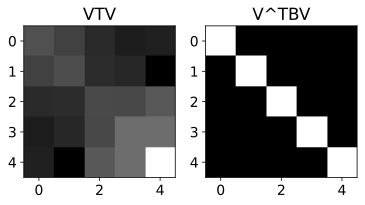

In [11]:
#Exer 10
# two symmetric matrices and GED

n = 5
A = np.random.randn(n,n)
A = A.T@A
B = np.random.randn(n,n)
B = B.T@B

evals,evecs = scipy.linalg.eigh(A,B)

# eigenvectors times their transposes
VV  = evecs.T @ evecs
VBV = evecs.T @ B @ evecs


# show in an image
_,axs = plt.subplots(1,2,figsize=(6,3))

axs[0].imshow(VV,cmap='gray')
axs[0].set_title('VTV')

axs[1].imshow(VBV,cmap='gray')
axs[1].set_title('V^TBV')

plt.show()

In [12]:
#Exer 11
A=np.random.randint(-15,15,(4,4))
print(f'Matrix is:\n{A}\n')
L,V=np.linalg.eig(A)
A_recon = V@np.diag(L)@np.linalg.pinv(V)
print(f'A+VLV^-1:\n{np.round(A_recon,2)}\n')

for i in range(A_recon.shape[0]):
    print(np.linalg.norm(V[:,i]))

V=np.pi*V

A_recon = V@np.diag(L)@np.linalg.pinv(V)
print(f'A+VLV^-1:\n{np.round(A_recon,2)}\n')


Matrix is:
[[-14  11  -9  -5]
 [ -7 -14  -4   1]
 [  7   2   5 -12]
 [ 12   9  -4  11]]

A+VLV^-1:
[[-14.+0.j  11.-0.j  -9.-0.j  -5.-0.j]
 [ -7.+0.j -14.-0.j  -4.+0.j   1.+0.j]
 [  7.-0.j   2.+0.j   5.-0.j -12.-0.j]
 [ 12.-0.j   9.+0.j  -4.-0.j  11.-0.j]]

1.0
0.9999999999999999
0.9999999999999999
1.0
A+VLV^-1:
[[-14.-0.j  11.+0.j  -9.-0.j  -5.+0.j]
 [ -7.+0.j -14.-0.j  -4.+0.j   1.+0.j]
 [  7.-0.j   2.+0.j   5.-0.j -12.-0.j]
 [ 12.-0.j   9.-0.j  -4.-0.j  11.-0.j]]

